In [ ]:
!pip install japanize-matplotlib

In [4]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd

In [9]:
ims_df = pd.read_csv("/content/sample_pandas_6 (2).csv")
print(ims_df.head())
print(ims_df.describe())

          発注日      商品番号              商品名   単価  在庫  注文数
0  2016-03-06  YY4HAAZR  商品サンプル YY4HAAZR  780  20   24
1  2015-03-27  Z4WOOIYV  商品サンプル Z4WOOIYV   90  45   12
2  2017-05-31  YY4HAAZR  商品サンプル YY4HAAZR  780  10    0
3  2022-10-26  1QJFO8QY  商品サンプル 1QJFO8QY  600   5   24
4  2016-06-10  1QJFO8QY  商品サンプル 1QJFO8QY  600  40   24
               単価          在庫         注文数
count  200.000000  200.000000  200.000000
mean   422.400000   25.775000   30.990000
std    247.575662   15.907218   19.377236
min     90.000000    0.000000    0.000000
25%    120.000000   10.000000   12.000000
50%    420.000000   25.000000   30.000000
75%    660.000000   40.000000   48.000000
max    780.000000   50.000000   60.000000


In [50]:
ims_df['発注日'] = pd.to_datetime(ims_df['発注日'])
type(pd.to_datetime(df['発注日'].loc[0]))

pandas._libs.tslibs.timestamps.Timestamp

In [51]:
def tax(x):
  return x * 1.10
ims_df['単価'].apply(tax)

,単価
0,858.0
1,99.0
2,858.0
3,660.0
4,660.0
...,...
195,660.0
196,99.0
197,363.0
198,462.0


In [52]:
tax_series = df['単価'].apply(tax)
tax_series.name = "単価(税込み)"
pd.concat([ims_df, tax_series], axis=1 )

,発注日,商品番号,商品名,単価,在庫,注文数,単価(税込み)
0,2016-03-06,YY4HAAZR,商品サンプル YY4HAAZR,780,20,24,858.0
1,2015-03-27,Z4WOOIYV,商品サンプル Z4WOOIYV,90,45,12,99.0
2,2017-05-31,YY4HAAZR,商品サンプル YY4HAAZR,780,10,0,858.0
3,2022-10-26,1QJFO8QY,商品サンプル 1QJFO8QY,600,5,24,660.0
4,2016-06-10,1QJFO8QY,商品サンプル 1QJFO8QY,600,40,24,660.0
...,...,...,...,...,...,...,...
195,2021-08-02,1QJFO8QY,商品サンプル 1QJFO8QY,600,10,42,660.0
196,2019-05-28,X0ZE2ZMY,商品サンプル X0ZE2ZMY,90,45,30,99.0
197,2015-06-22,48XMJXKO,商品サンプル 48XMJXKO,330,50,36,363.0
198,2022-08-29,QRMOGNUU,商品サンプル QRMOGNUU,420,40,48,462.0


In [53]:
category_df = pd.read_csv('/content/category (2).csv')
category_df.head()

,商品番号,カテゴリー
0,YY4HAAZR,弁当
1,Z4WOOIYV,飲料水
2,1QJFO8QY,弁当
3,MESUDVWQ,菓子類
4,S6RE8W6X,図書・新聞


In [54]:
df = pd.merge(ims_df, category_df[['商品番号', 'カテゴリー']],how='inner', on='商品番号' )
df.head()

,発注日,商品番号,商品名,単価,在庫,注文数,カテゴリー
0,2016-03-06,YY4HAAZR,商品サンプル YY4HAAZR,780,20,24,弁当
1,2015-03-27,Z4WOOIYV,商品サンプル Z4WOOIYV,90,45,12,飲料水
2,2017-05-31,YY4HAAZR,商品サンプル YY4HAAZR,780,10,0,弁当
3,2022-10-26,1QJFO8QY,商品サンプル 1QJFO8QY,600,5,24,弁当
4,2016-06-10,1QJFO8QY,商品サンプル 1QJFO8QY,600,40,24,弁当


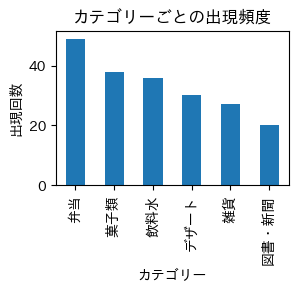

In [55]:
catetory_counts = df['カテゴリー'].value_counts()

plt.figure(figsize=(3,2))
catetory_counts.plot(kind='bar', title='カテゴリーごとの出現頻度')
plt.xlabel('カテゴリー')
plt.ylabel('出現回数')
plt.show()

In [ ]:
df.groupby('商品番号')['注文数'].count()
df.groupby('商品番号')['注文数'].mean()
df.groupby('商品番号')['注文数'].std()
df.groupby('商品番号')['注文数'].min()
df.groupby('商品番号')['注文数'].quantile(0.25)
df.groupby('商品番号')['注文数'].median()
df.groupby('商品番号')['注文数'].quantile(0.75)
df.groupby('商品番号')['注文数'].max()

In [58]:
df.groupby('商品番号')['注文数'].describe()

,count,mean,std,min,25%,50%,75%,max
商品番号,,,,,,,,
1QJFO8QY,32.0,35.250000,18.461818,0.0,24.0,36.0,49.5,60.0
2HSTCDWM,20.0,29.400000,21.137146,0.0,12.0,27.0,48.0,60.0
48XMJXKO,10.0,21.600000,13.326665,0.0,13.5,21.0,30.0,42.0
8T7D5DQA,21.0,25.142857,18.260027,0.0,12.0,36.0,42.0,54.0
MESUDVWQ,17.0,43.764706,18.219253,0.0,42.0,48.0,54.0,60.0
QRMOGNUU,27.0,33.111111,16.588535,6.0,21.0,36.0,48.0,60.0
S6RE8W6X,20.0,33.300000,21.631118,0.0,12.0,39.0,54.0,60.0
X0ZE2ZMY,14.0,21.857143,21.901377,0.0,1.5,15.0,39.0,60.0
YY4HAAZR,17.0,31.764706,18.095336,0.0,18.0,30.0,42.0,60.0
